In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

(512, 512)


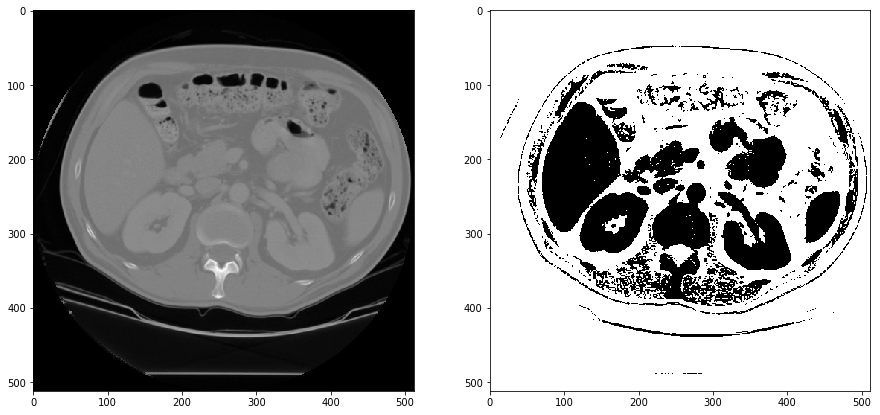

In [48]:
im = cv2.imread("../input_data/kidney.jpg",0)
# im2 = cv2.imread("../input_data/kidney.jpg")
i = (im < 130).astype(np.uint8)
print(im.shape)
fig = plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(i,cmap='gray')
plt.show()

# plt.imshow(i,cmap='gray')

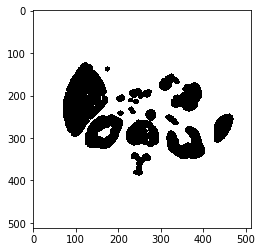

In [49]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
dilated = cv2.dilate(i,kernel,iterations=2)
eroded = cv2.erode(dilated,kernel,iterations=2)
plt.imshow(eroded,cmap='gray')

In [50]:
def fourConnComp(i,j,c,im,final,visited):
    if(i<0 or i>=final.shape[0] or j<0 or j>=final.shape[1] or visited[i,j] == 1):
        return 0
    visited[i,j] = 1
    if(im[i,j] == 0):
        final[i,j] = c
        fourConnComp(i+1,j,c,im,final,visited)
        fourConnComp(i-1,j,c,im,final,visited)
        fourConnComp(i,j+1,c,im,final,visited)
        fourConnComp(i,j-1,c,im,final,visited)
    return 0
    

In [51]:
def fill_color(im):
    colors = []    
    h,w = im.shape
    visited = np.zeros((h,w))
    final = np.zeros((h,w,3),dtype = np.uint16)
    for i in range(100):
        color = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        colors.append(color)
    
    for i in range(h):
        for j in range(w):
            if(im[i,j] == 0 and visited[i,j] == 0):
                fourConnComp(i,j,colors[j%100],im,final,visited)
    
    return final
    

In [52]:
lol = fill_color(eroded)

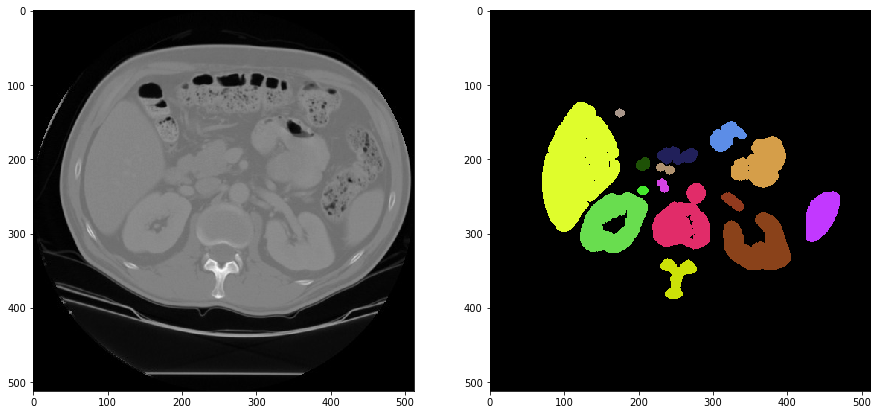

In [53]:
fig = plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(lol)
plt.show()